# ENSANBLADO DE ALGORITMOS

Es una ténica pra mejorar el resultado de una predicción, combinando de alguna forma varios modelos. Los métodos más comunes son:

    - Boostring
    - Bagging
    - Stacking
    - Random Forest

---
### Boosting. AdaBoost

El primer modelo se le llama aprendiz. Normalmente se hace con el mismo 

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons

<Axes: >

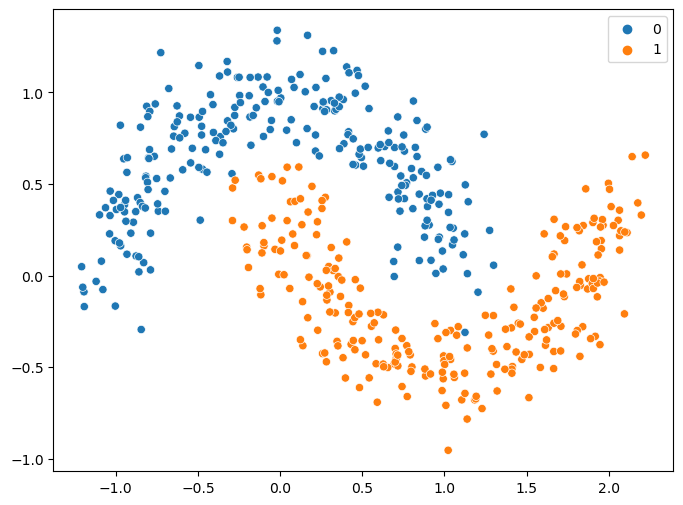

In [4]:
X, y = make_moons(n_samples = 500, noise = 0.15, random_state = 0)
plt.figure(figsize = (8, 6))
sb.scatterplot(data = X, x = X[:,0], y = X[:,1], hue = y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [6]:
# esta es la base que vamos a ultilizar para empezar el adaBoost
treeModel = DecisionTreeClassifier(max_depth = 2, random_state = 0)
treeModel.fit(X_train, y_train)
yPredTree = treeModel.predict(X_test)
accuracyTree = accuracy_score(y_test, yPredTree)
scoreTree = treeModel.score(X_test, y_test)
print(accuracyTree)
print(scoreTree)

0.91
0.91


# Entrenamos el modelo con 100 aprendices

In [12]:
estimadorBase = DecisionTreeClassifier(max_depth = 2)

ada_clf = AdaBoostClassifier(estimator = estimadorBase, n_estimators = 100, random_state = 0)

ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.97

---

# EJERCICIO

    · Con SQL, Seleccionar las columnas numéricas del datset "Titanic"
    · Con SQL, Seleccionar la columna "survived" como objetivo y el resto como predictoras.
    · Usar "DecisionTreeClassifier" y "AdaBoostClassifier", y comparar los resultados.

In [15]:
#Importamos librerías

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandasql import sqldf

In [17]:
# Leer los dataframes
titanic = pd.read_csv("./titanic1.csv")

In [18]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
pysqldf = lambda q: sqldf(q, globals()) 

In [29]:
query = query = """SELECT * FROM titanic WHERE typeof(Pclass) IN ('integer', 'decimal', 'numeric', 'float', 'real')"""
titanic = pysqldf(query) # nos devuelve UN df/DATASET NUEVO 
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S
